# Ideal time and message cost analysis for Mega-Merger: comparing theoretical results with empirical simulations

In [ ]:
%matplotlib inline

from pydistsim.demo_algorithms.santoro2007.mega_merger.algorithm import MegaMergerAlgorithm, ExampleParameters
from pydistsim.benchmark import AlgorithmBenchmark
from pydistsim.network.behavior import NetworkBehaviorModel

# Benchmarking: ideal communications

For this part, we will run a battery of simulations with the help of the benchmark module.

The parameters we will use are:

#. The algorithm to test.

#. The sizes of the networks to test.

#. The number of simulations to run for each network configuration (1 for now).

#. The network behavior (ideal communications obviously).

In [3]:
from collections import defaultdict


benchmark_ideal = AlgorithmBenchmark(
    ((MegaMergerAlgorithm, ExampleParameters.numerical_parameters),),
    network_behavior=NetworkBehaviorModel.IdealCommunication,
    network_sizes=list(range(1, 30)) + list(range(30, 100, 10)) + list(range(100, 501, 50)),
    network_repeat_count=defaultdict(lambda: 1),  # 1 run for every network configurations
)

benchmark_ideal.run()

After the benchmark terminates, we can plot the results. But first, lets take a look at the raw data so we can understand
what we may achieve.

In [4]:
benchmark_ideal.get_results_dataframe(grouped=True)

,Net. node count,Network type,Net. edge count,Qty. of messages sent,Qty. of messages delivered,Qty. of status changes,Qty. of steps
0,1,complete,0,0.0,1.0,4.0,3.0
1,1,homogeneous,0,0.0,1.0,4.0,3.0
2,1,hypercube,0,0.0,1.0,4.0,3.0
3,1,rectangular mesh,0,0.0,1.0,4.0,3.0
4,1,rectangular torus,1,1.0,2.0,7.0,5.0
...,...,...,...,...,...,...,...
260,483,rectangular mesh,802,8964.0,9146.0,10833.0,1215.0
261,500,complete,124750,256830.0,257033.0,339751.0,1423.0
262,500,homogeneous,10422,28268.0,28472.0,32991.0,447.0
263,500,ring,500,9337.0,9536.0,10145.0,2634.0


#### Plot everything:

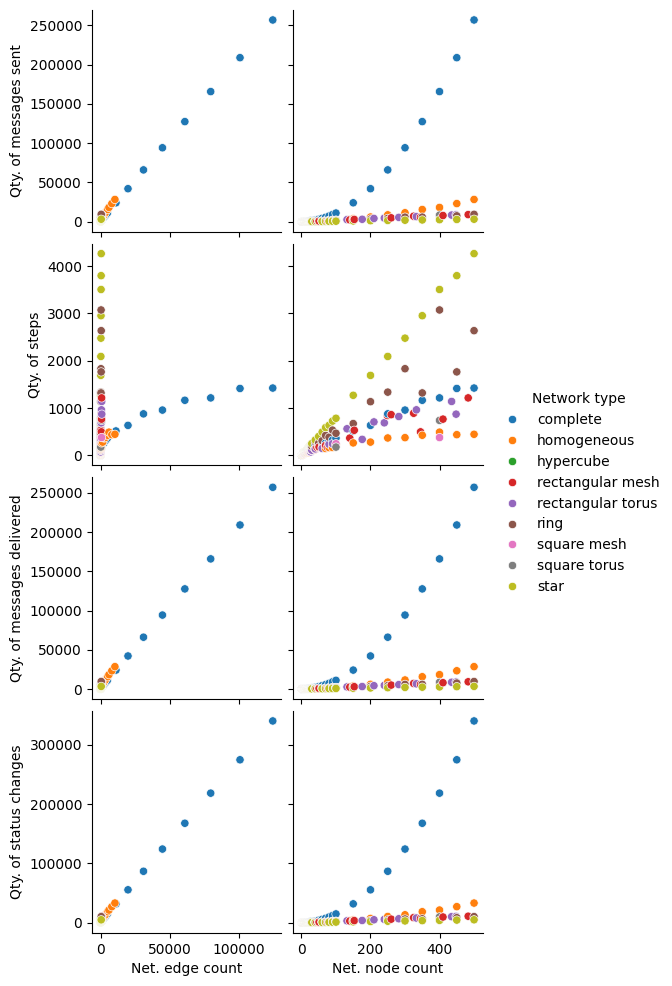

In [5]:
benchmark_ideal.plot_analysis()

#### Plot only complete network results

Since the complete and homogeneous network results are the most interesting, we will plot them separately.

##### Complete network runs

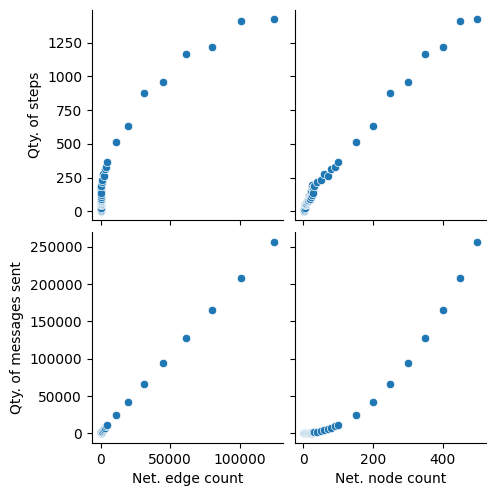

In [6]:
benchmark_ideal.plot_analysis(
    result_filter=lambda line: line["Network type"] == "complete", y_vars=["Qty. of messages sent", "Qty. of steps"]
)

##### Homogeneous network runs

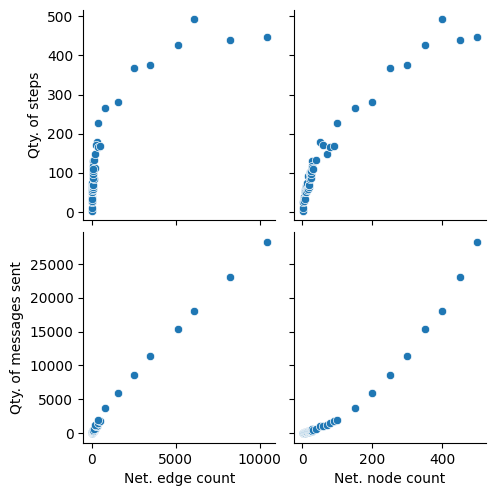

In [7]:
benchmark_ideal.plot_analysis(
    result_filter=lambda line: line["Network type"] == "homogeneous", y_vars=["Qty. of messages sent", "Qty. of steps"]
)

##### Every other network type

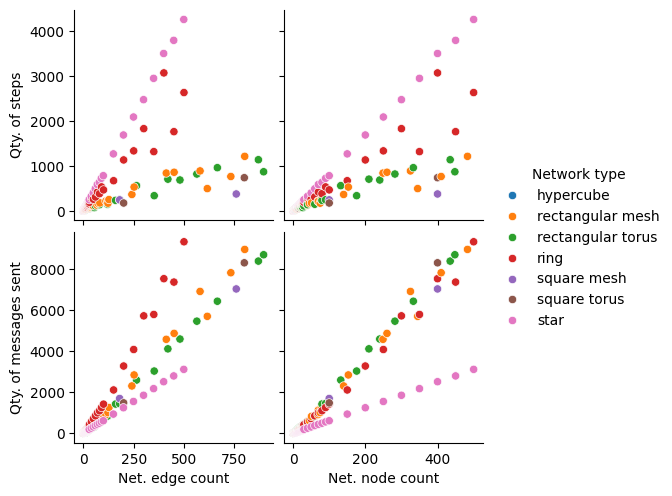

In [8]:
benchmark_ideal.plot_analysis(
    result_filter=lambda line: line["Network type"] not in ("complete", "homogeneous"),
    y_vars=["Qty. of messages sent", "Qty. of steps"],
)

In [9]:
# backup the results, since we will overwrite them
back = benchmark_ideal.results.copy()

## Plotting against theoretical upper bound

### Message count as a function of the number of edges

To be able to plot the theoretical upper bound, we first need to project it to a 2D space. We can do this by taking the
quantity of nodes as the maximum possible for any given number of edges. Now the bound is a function of the number of edges
only.

First we add the theoretical execution metrics to the benchmark results:

In [11]:
from math import log2

for m in range(1, 1001):
    m = m * 1.0

    n = 1.0 * (m + 1)  # Maximum number of nodes for any connected network with m edges

    loose_bound = m + n * log2(n)  # O(m + n log n)
    benchmark_ideal.results.insert(
        0,
        {
            "Net. node count": n,
            "Net. edge count": m,
            "Network type": "ref. O(m + n log n)",
            "Qty. of messages sent": loose_bound,
            "Qty. of messages delivered": loose_bound,
            "Qty. of status changes": loose_bound,
            "Qty. of steps": loose_bound,
        },
    )

    tight_bound = 2 * m + 5 * n * log2(n) + n + 1
    benchmark_ideal.results.insert(
        0,
        {
            "Net. node count": n,
            "Net. edge count": m,
            "Network type": "ref. 2m + 5n log(n) + n + 1",
            "Qty. of messages sent": tight_bound,
            "Qty. of messages delivered": tight_bound,
            "Qty. of status changes": tight_bound,
            "Qty. of steps": tight_bound,
        },
    )

##### Plot the results

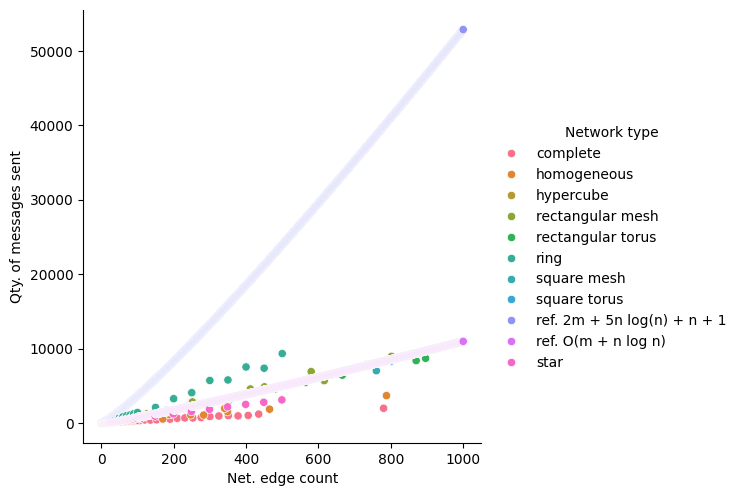

In [12]:
benchmark_ideal.plot_analysis(
    result_filter=lambda line: line["Net. edge count"] <= 1000,
    y_vars=[
        "Qty. of messages sent",
    ],
    x_vars=["Net. edge count"],
    pairplot_kwargs={"height": 5},
)

### Message count as a function of the number of nodes

Again, we project the theoretical upper bound to a 2D space. Now the bound is a function of the number of nodes only.

In [13]:
from math import log2

# restore the original results
benchmark_ideal.results = back.copy()

for n in range(1, 501):
    n = 1.0 * n
    m = n * (n - 1) / 2  # Maximum number of edges for any connected network with n nodes (a complete graph)

    loose_bound = m + n * log2(n)  # O(m + n log n)
    benchmark_ideal.results.insert(
        0,
        {
            "Net. node count": n,
            "Net. edge count": m,
            "Network type": "ref. O(m + n log n)",
            "Qty. of messages sent": loose_bound,
            "Qty. of messages delivered": loose_bound,
            "Qty. of status changes": loose_bound,
            "Qty. of steps": loose_bound,
        },
    )

    tight_bound = 2 * m + 5 * n * log2(n) + n + 1
    benchmark_ideal.results.insert(
        0,
        {
            "Net. node count": n,
            "Net. edge count": m,
            "Network type": "ref. 2m + 5n log(n) + n + 1",
            "Qty. of messages sent": tight_bound,
            "Qty. of messages delivered": tight_bound,
            "Qty. of status changes": tight_bound,
            "Qty. of steps": tight_bound,
        },
    )

##### Plot the results

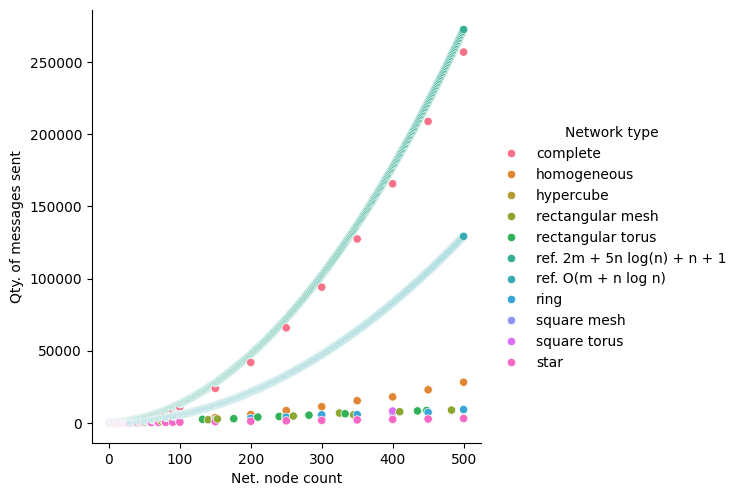

In [14]:
benchmark_ideal.plot_analysis(
    y_vars=[
        "Qty. of messages sent",
    ],
    x_vars=["Net. node count"],
    pairplot_kwargs={"height": 5},
)

In [15]:
# restore the original results
benchmark_ideal.results = back.copy()

## Inferring time complexity

Let's focus on the quantity of steps as a function of the number of nodes and edges.

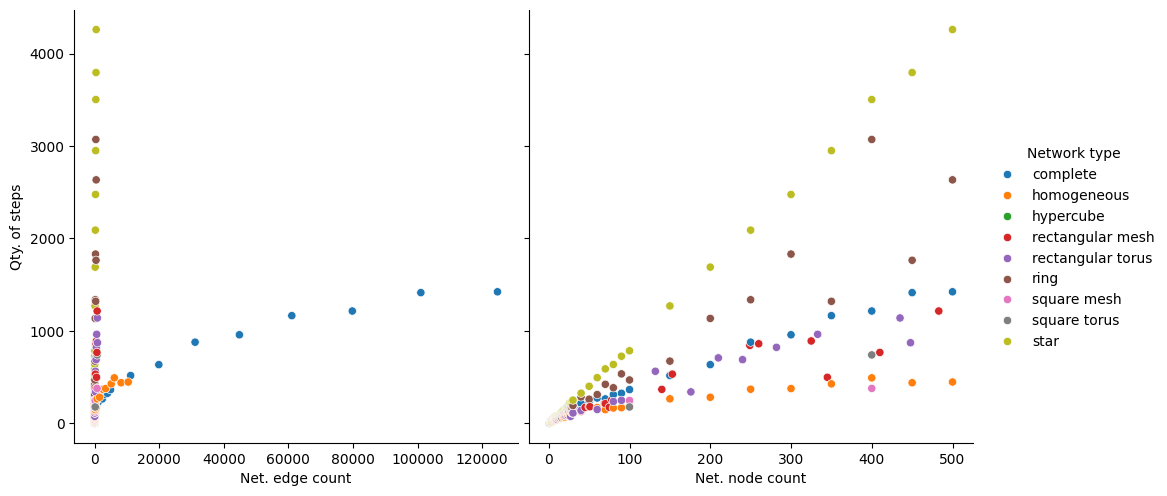

In [19]:
benchmark_ideal.plot_analysis(
    y_vars=["Qty. of steps"],
    pairplot_kwargs={"height": 5},
)

Since we are aiming to infer the worst time complexity of the algorithm, we must focus on the worst case scenario. This
seems to be the case where the network is a ring:

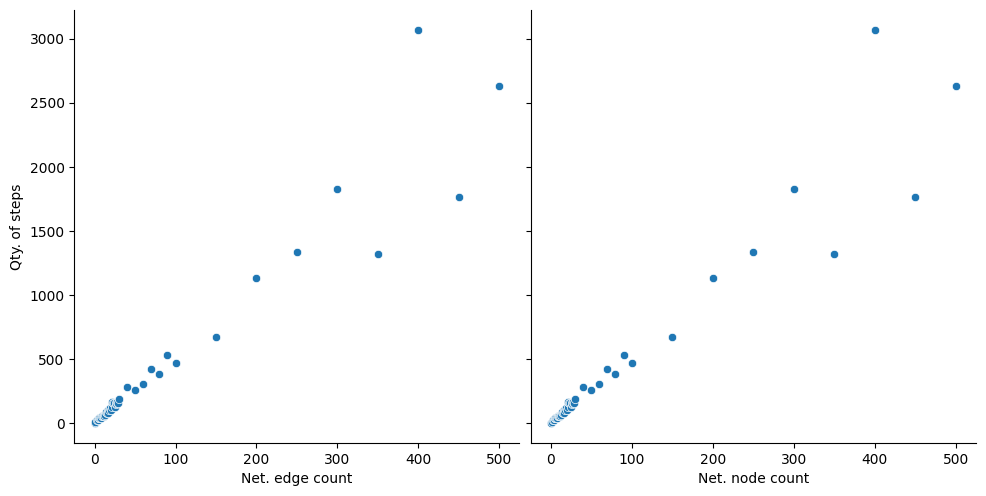

In [21]:
benchmark_ideal.plot_analysis(
    y_vars=["Qty. of steps"],
    result_filter=lambda line: line["Network type"] == "ring",
    pairplot_kwargs={"height": 5},
)

Obviously, the number of steps appears to be a linear function of the number of nodes and edges.
Let's plot a linear regression to confirm this.

In [29]:
from math import log2

# restore the original results
benchmark_ideal.results = back.copy()

for n in range(1, 501):
    n = 1.0 * n
    m = n - 1

    loose_bound = m + n * log2(n)  # O(m + n log n)
    benchmark_ideal.results.insert(
        0,
        {
            "Net. node count": n,
            "Net. edge count": m,
            "Network type": "ref. O(n)",
            "Qty. of messages sent": n,
            "Qty. of messages delivered": n,
            "Qty. of status changes": n,
            "Qty. of steps": 10 * n,
        },
    )

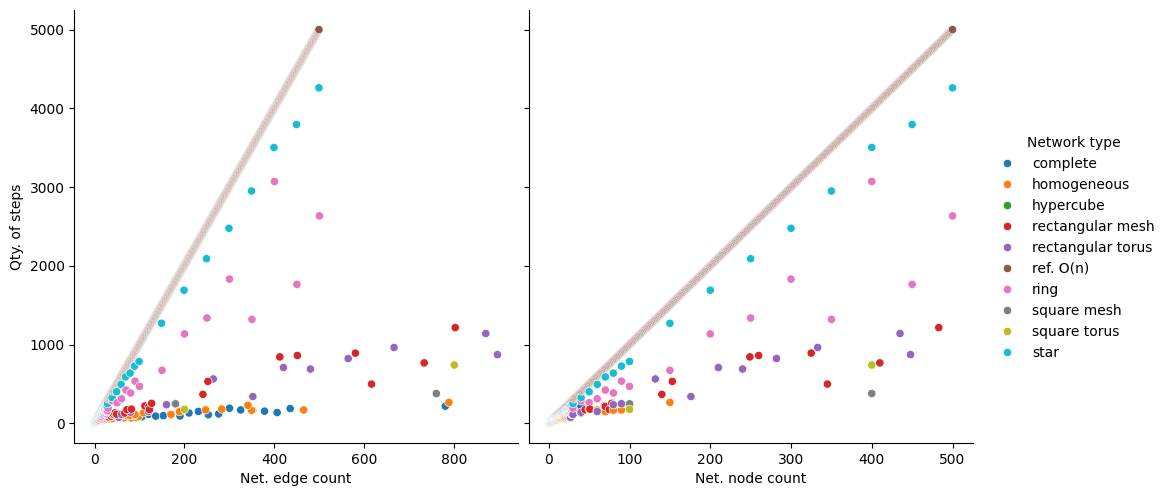

In [34]:
benchmark_ideal.plot_analysis(
    y_vars=["Qty. of steps"],
    result_filter=lambda line: line["Net. edge count"] < 1_000,
    pairplot_kwargs={"height": 5},
)

# Benchmarking: communication with delays

Now we will run a very similar battery of simulations, but with a delay in the communications. We will not
analyze the results in detail again.

In [35]:
benchmark_with_delay = AlgorithmBenchmark(
    ((MegaMergerAlgorithm, ExampleParameters.numerical_parameters),),
    network_behavior=NetworkBehaviorModel.RandomDelayCommunication,
    network_sizes=list(range(1, 15)) + list(range(15, 76, 10)) + list(range(100, 200, 50)),
    network_repeat_count=defaultdict(lambda: 1),
)

benchmark_with_delay.run()

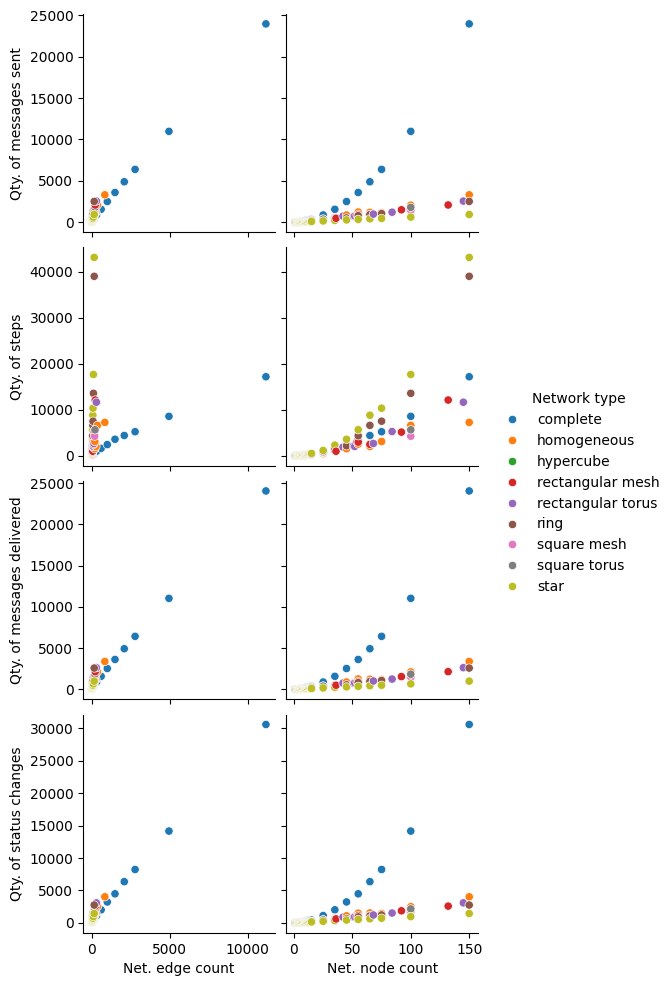

In [36]:
benchmark_with_delay.plot_analysis()

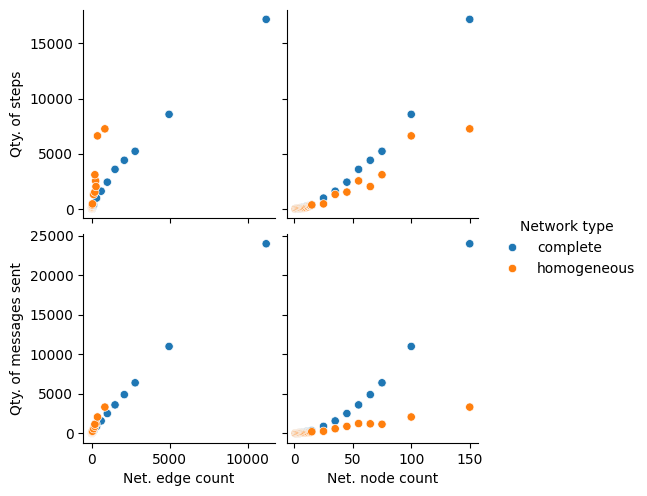

In [37]:
benchmark_with_delay.plot_analysis(
    result_filter=lambda line: line["Network type"] in ("complete", "homogeneous"),
    y_vars=["Qty. of messages sent", "Qty. of steps"],
)

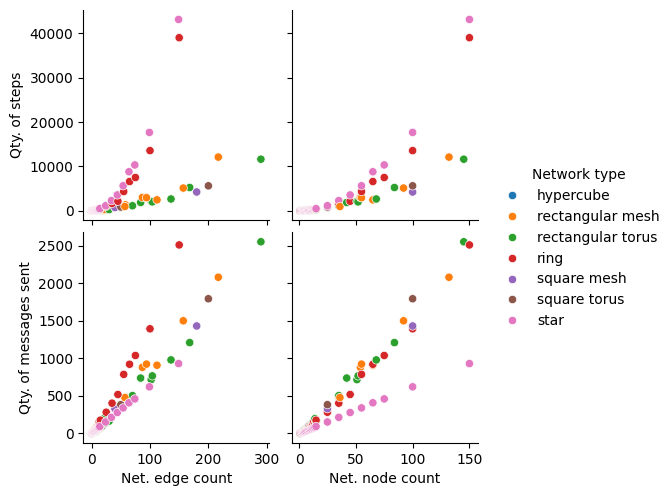

In [38]:
benchmark_with_delay.plot_analysis(
    result_filter=lambda line: line["Network type"] not in ("complete", "homogeneous"),
    y_vars=["Qty. of messages sent", "Qty. of steps"],
)